In [1]:
import torch
frames = torch.load('tensor.pt').cpu()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

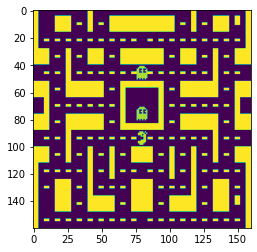

(160, 160)

In [105]:
import matplotlib.pyplot as plt
size = range(10,170)
img_full = frames[0].cpu().numpy()[size]
img = frames[0].cpu().numpy()[:,:,0][size]#data.coins()
plt.imshow(img)
plt.show()
img.shape

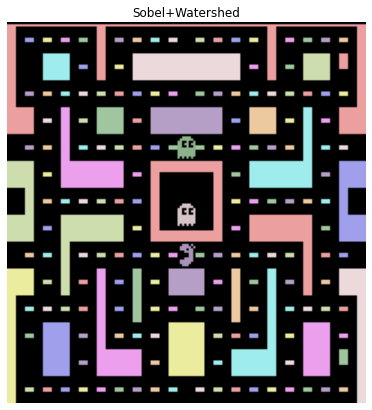

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import watershed#, expand_labels
from skimage.color import label2rgb
from skimage import data

# Make segmentation using edge-detection and watershed.
edges = sobel(img)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(img)
foreground, background = 1, 2
markers[img < 30.0] = background
markers[img > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

# Show the segmentations.
plt.figure(figsize=(14, 7))
color1 = label2rgb(seg1, image=img, bg_label=0)
plt.imshow(color1)
plt.title('Sobel+Watershed')
plt.axis('off')
plt.show()

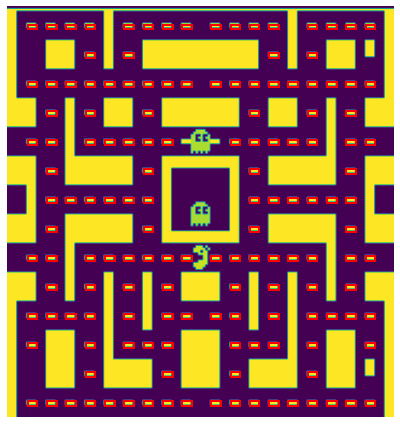

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
imgs=[]
ax.imshow(img)
import matplotlib.patches as mpatches
from skimage.measure import regionprops
for region in regionprops(seg1):
    # take regions with large enough areas
    if region.area >= 5 and region.area < 10:
#     if region.area >= 50 and region.area < 90:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        imgs+=[region.bbox]
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [57]:
imgs

[(7, 8, 9, 12),
 (7, 16, 9, 20),
 (7, 24, 9, 28),
 (7, 32, 9, 36),
 (7, 48, 9, 52),
 (7, 56, 9, 60),
 (7, 64, 9, 68),
 (7, 72, 9, 76),
 (7, 84, 9, 88),
 (7, 92, 9, 96),
 (7, 100, 9, 104),
 (7, 108, 9, 112),
 (7, 124, 9, 128),
 (7, 132, 9, 136),
 (7, 140, 9, 144),
 (7, 148, 9, 152),
 (19, 32, 21, 36),
 (19, 48, 21, 52),
 (19, 108, 21, 112),
 (19, 124, 21, 128),
 (31, 8, 33, 12),
 (31, 16, 33, 20),
 (31, 24, 33, 28),
 (31, 32, 33, 36),
 (31, 40, 33, 44),
 (31, 48, 33, 52),
 (31, 56, 33, 60),
 (31, 64, 33, 68),
 (31, 72, 33, 76),
 (31, 84, 33, 88),
 (31, 92, 33, 96),
 (31, 100, 33, 104),
 (31, 108, 33, 112),
 (31, 116, 33, 120),
 (31, 124, 33, 128),
 (31, 132, 33, 136),
 (31, 140, 33, 144),
 (31, 148, 33, 152),
 (43, 16, 45, 20),
 (43, 32, 45, 36),
 (43, 56, 45, 60),
 (43, 100, 45, 104),
 (43, 124, 45, 128),
 (43, 140, 45, 144),
 (55, 8, 57, 12),
 (55, 16, 57, 20),
 (55, 32, 57, 36),
 (55, 40, 57, 44),
 (55, 48, 57, 52),
 (55, 56, 57, 60),
 (55, 64, 57, 68),
 (55, 92, 57, 96),
 (55, 100, 

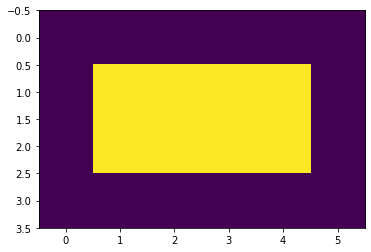

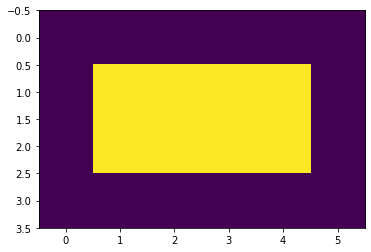

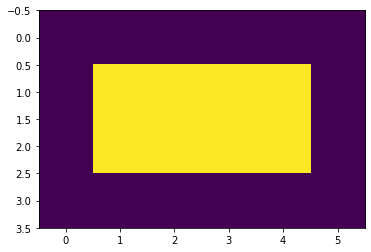

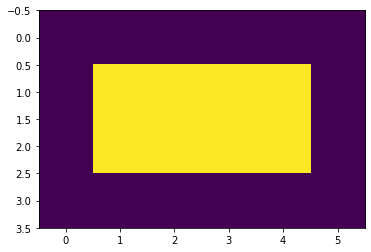

In [100]:
for i, region in enumerate(regionprops(seg1)):
    # take regions with large enough areas
    # if I select just the tile, it will show purple
    if region.area >= 1 and region.area < 100 and i % len(regionprops(seg1))//5 == 0:
#         plt.imshow(region.image)
        minr, minc, maxr, maxc = region.bbox
        plt.imshow(img[minr-1:maxr+1, minc-1:maxc+1])
        plt.show()

In [45]:
len(regionprops(seg1))

177

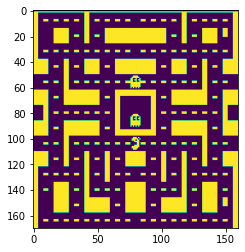

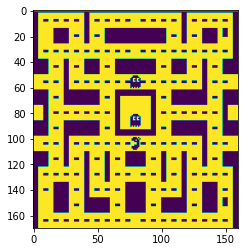

In [50]:
plt.imshow(img > 100.0)
plt.show()
plt.imshow(img < 30.0)
plt.show()

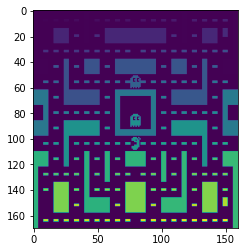

In [6]:
plt.imshow(seg1)
plt.show()

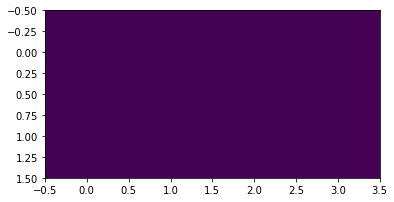

In [34]:
plt.imshow(regionprops(seg1)[3].image)

In [60]:
regionprops(seg1)[1].bbox

(7, 8, 9, 12)

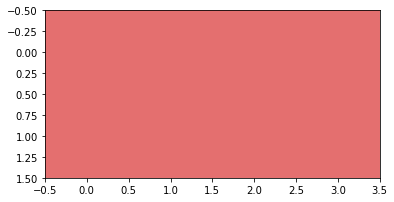

In [81]:
plt.imshow(img_full[7:9, 8:12])
plt.show()

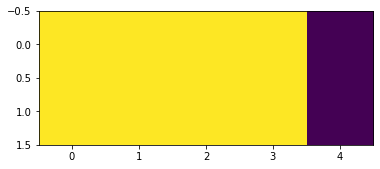

In [73]:
plt.imshow(img[7:9, 8:13])
plt.show()

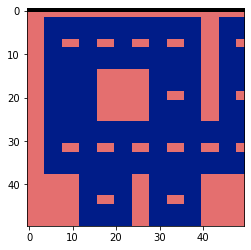

In [78]:
plt.imshow(img_full[0:50, 0:50])